# Assignment 1 - Q3 (Using panelist data)

The IRI data is set available on the AWS instance.  Several additional documents describing the data set and pointing to additional Bibliography are made available (including the white paper: Bronnenberg, Bart J., Kruger, Michael W, and Mela, Carl F. The IRI Marketing Dataset.).  Getting to know this data set is time well spent as it will be very applicable towards the Final project.  The data set is of medium size and complexity – however understanding the data and how file/folders/datasets related to each other will be of crucial importance for creating an appropriate training data set.  
The data set has been purchase by UCSD, it is only for internal use and comes with restrictions.  Please read and follow the NDA specified at the very end of the “IRI_database_technical_appendix” document provided with the data set.  
I order to answer the questions below – document and describe what kind of data preparation and cleaning techniques did you have to apply?  What kinds of anomalies and missing data did you encounter?  Document how what assumption you made and how you approach the issues.
1. What are the most popular item(s) for a chosen product/category?
2. How does the popularity of an item change with the cost associated with it for a chosen year?
3. How is the popularity affected over the years? 

#### Note:

We have used the Salty snacks data for the years 8 to 11 for this analysis.

#### Key Take away:

1. Q2 has the heaviest sales
2. Weekday afternoons and Saturdays have most sales for salty snacks

In [2]:
## Import libraries

import numpy as np
from sklearn.cross_validation import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/Processed data

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/Processed data


In [4]:
# Get the panel data (Used old version of the data as I was focusing only on 4 stores)
panel_demo_store_8_11 = pd.read_csv('panel_demo_store_8_11.csv',sep=',')

In [5]:
week_translation = pd.read_csv('IRI week translation_2008_2017.csv')

In [6]:
combined_with_year = pd.merge(panel_demo_store_8_11,week_translation, how='left',on='week' )

### Most popular product category

In [7]:
## Popular product category
combined_with_year2 = (combined_with_year[['year','l2','units','dollars']].groupby(['year','l2']).sum().reset_index()).sort(['year','units'],ascending =[True,False]).copy()
combined_with_year2['rnk'] = combined_with_year2.groupby(['year']).units.rank(ascending=False)
combined_with_year2[combined_with_year2['rnk'].isin([1,2])]

,year,l2,units,dollars,rnk
4,8,POTATO CHIPS,3937,8083.92,1
7,8,TORTILLA/TOSTADA CHIPS,2723,6897.83,2
12,9,POTATO CHIPS,4038,9842.22,1
15,9,TORTILLA/TOSTADA CHIPS,2656,6563.61,2
20,10,POTATO CHIPS,4357,9857.02,1
23,10,TORTILLA/TOSTADA CHIPS,2365,5951.09,2
28,11,POTATO CHIPS,4169,10187.12,1
31,11,TORTILLA/TOSTADA CHIPS,2406,6061.48,2


### By outlet and by product category

In [8]:
## By outlet type and product category
combined_with_year2 = (combined_with_year[['year','outlet','l2','units','dollars']].groupby(['year','outlet','l2']).sum().reset_index()).sort(['year','units'],ascending =[True,False]).copy()
combined_with_year2['rnk'] = combined_with_year2.groupby(['year','outlet']).units.rank(ascending=False)
combined_with_year2[combined_with_year2['rnk'].isin([1])]

,year,outlet,l2,units,dollars,rnk
12,8,GK,POTATO CHIPS,3497,7545.65,1
4,8,DK,POTATO CHIPS,440,538.27,1
27,9,GK,POTATO CHIPS,3908,9644.73,1
19,9,DK,POTATO CHIPS,130,197.49,1
42,10,GK,POTATO CHIPS,4247,9670.03,1
34,10,DK,POTATO CHIPS,110,186.99,1
57,11,GK,POTATO CHIPS,3965,9854.56,1
49,11,DK,POTATO CHIPS,204,332.56,1


### By quarter

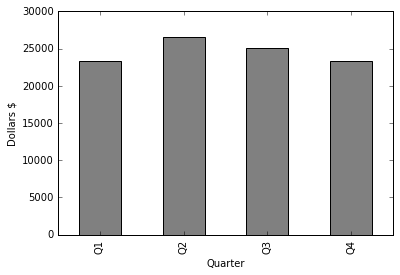

In [9]:
combined_with_year.groupby(['quarter']).dollars.sum().plot(kind = 'bar',color='grey')
plt.ylabel('Dollars $')
plt.xlabel('Quarter')
plt.show()

In [10]:
combined_with_year.groupby(['quarter']).dollars.sum()

quarter
Q1    23398.11
Q2    26633.58
Q3    25041.21
Q4    23281.38
Name: dollars, dtype: float64

### 'Time of the day' and 'Day of the week'

In [11]:
## Add hour flag

mon = pd.DataFrame(zip(range(0,1440),['01_Monday']*1440,range(0,1440)))
tue = pd.DataFrame(zip(range(1440,1440*2),['02_Tuesday']*1440,range(0,1440)))
wed = pd.DataFrame(zip(range(1440*2,1440*3),['03_Wednesday']*1440,range(0,1440)))
thu = pd.DataFrame(zip(range(1440*3,1440*4),['04_Thursday']*1440,range(0,1440)))
fri = pd.DataFrame(zip(range(1440*4,1440*5),['05_Friday']*1440,range(0,1440)))
sat = pd.DataFrame(zip(range(1440*5,1440*6),['06_Saturay']*1440,range(0,1440)))
sun = pd.DataFrame(zip(range(1440*6,1440*7),['07_Sunday']*1440,range(0,1440)))

frames = [mon,tue,wed,thu,fri,sat,sun]

final_week_days = pd.concat(frames)

## Create hour flag

final_week_days.columns = ['minute','day_of_the_week','minute_by_day']
final_week_days['hour'] = (final_week_days['minute_by_day']/60).round()
temp = combined_with_year.copy()
# temp2 = pd.merge(temp,week_transaltion,on='week')
temp2=temp.copy()

final_week_days['minute_by_day_new']=final_week_days['minute_by_day']+1

final_week_days['hour2'] = (final_week_days['minute_by_day_new']/60).round(2)

def func4(row):
    if row['hour2']>row['hour']:
        return row['hour']+1
    else:
        return row['hour']
        
final_week_days['hour_final'] = final_week_days.apply(func4,axis=1) 


def func(row):
    if row['hour_final'] in ([1,2,3,4,5,6,7,8,9]):
        return '01_before_office_hours'
    elif row['hour_final'] in ([10,11,12,13,14,15,16,17]):
        return '02_during_office_hours'
    elif row['hour_final'] in ([18,19,20,21,22,23,24]):
        return '03_after_office_hours'

final_week_days['time_of_the_day'] = final_week_days.apply(func,axis=1) 



def func2(row):
    if row['hour_final'] in ([1,2,3,4,5,6,7,8,9]):
        return '01_before_9'
    elif row['hour_final'] in ([10,11,12]):
        return '02_between_10_and_noon'
    elif row['hour_final'] in ([13,14,15,16]):
        return '03_afternoon'
    elif row['hour_final'] in ([17,18,19,20]):
        return '04_evening'
    elif row['hour_final'] in ([21,22,23,24]):
        return '05_night'

final_week_days['time_of_the_day2'] = final_week_days.apply(func2,axis=1) 


def func3(row):
    if row['day_of_the_week'] in (['01_Monday','02_Tuesday','03_Wednesday','04_Thursday','05_Friday']):
        return 'weekday'
    else:
        return 'weekend'

final_week_days['weekday_weekend'] = final_week_days.apply(func3,axis=1) 


final_week_days[['minute','day_of_the_week','minute_by_day','hour_final','time_of_the_day','time_of_the_day2','weekday_weekend']].to_csv('minute_mapping.csv')

final_week_days = final_week_days[['minute','day_of_the_week','minute_by_day','hour_final','time_of_the_day','time_of_the_day2','weekday_weekend']]

final_week_days.columns = ['minute','day_of_the_week','minute_by_day','hour','time_of_the_day','time_of_the_day2','weekday_weekend']

with_week_day = pd.merge(temp2,final_week_days, on = 'minute')


In [12]:
# with_week_day['weekday_weekend']

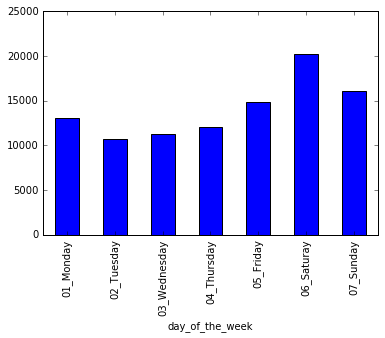

In [13]:
with_week_day.groupby(['day_of_the_week']).dollars.sum().plot(kind = 'bar')
plt.show()

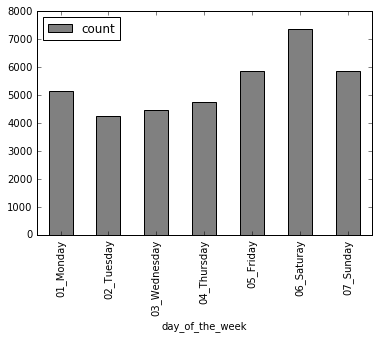

In [14]:
temp2 = with_week_day['day_of_the_week'].copy()

temp3 = pd.DataFrame(temp2.value_counts()).reset_index()
temp3.columns = ['day_of_the_week','count']
temp3.sort('day_of_the_week',inplace = True)

temp3.plot(kind='bar',x='day_of_the_week',color='grey')
plt.show()

In [15]:
temp3 = pd.DataFrame(temp2.value_counts())

In [16]:
temp3

,0
06_Saturay,7368
07_Sunday,5880
05_Friday,5879
01_Monday,5164
04_Thursday,4766
03_Wednesday,4460
02_Tuesday,4238


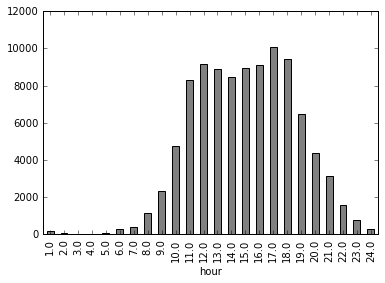

In [17]:
with_week_day.groupby(['hour']).dollars.sum().plot(kind = 'bar',color='grey')
plt.show()

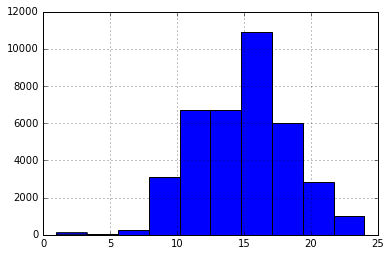

In [18]:
with_week_day['hour'].hist()

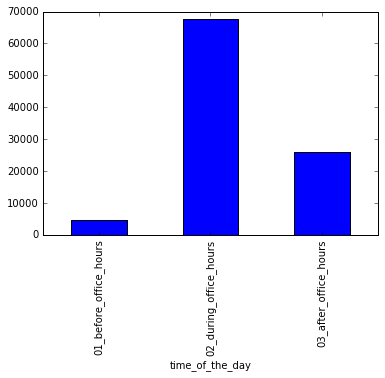

In [19]:
with_week_day.groupby(['time_of_the_day']).dollars.sum().plot(kind = 'bar')
plt.show()

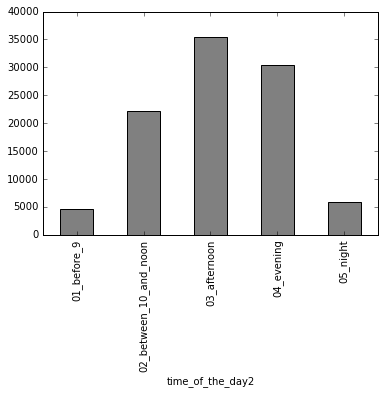

In [20]:
with_week_day.groupby(['time_of_the_day2']).dollars.sum().plot(kind = 'bar',color='grey')
plt.show()

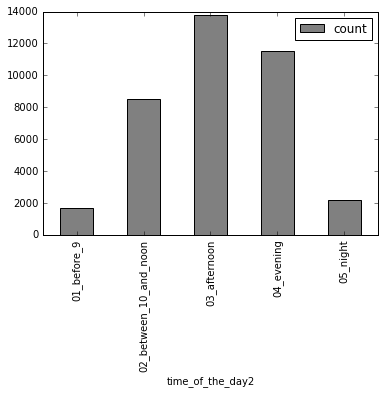

In [21]:
temp2 = with_week_day['time_of_the_day2'].copy()

temp3 = pd.DataFrame(temp2.value_counts()).reset_index()
temp3.columns = ['time_of_the_day2','count']
temp3.sort('time_of_the_day2',inplace = True)

temp3.plot(kind='bar',x='time_of_the_day2',color='grey')
plt.show()

In [22]:
with_week_day['combined_day_time'] = with_week_day['weekday_weekend']+'_'+with_week_day['time_of_the_day2']

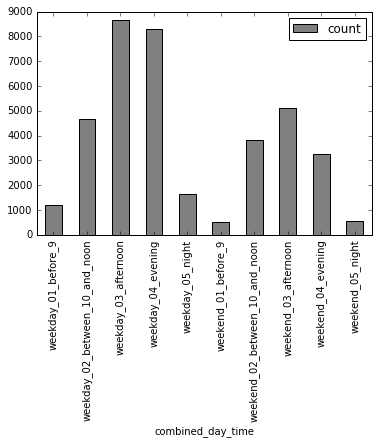

In [23]:
temp2 = with_week_day['combined_day_time'].copy()

temp3 = pd.DataFrame(temp2.value_counts()).reset_index()
temp3.columns = ['combined_day_time','count']
temp3.sort('combined_day_time',inplace = True)

temp3.plot(kind='bar',x=['combined_day_time'],color='grey')
plt.show()

In [24]:
temp3 = pd.DataFrame(temp2.value_counts())

In [25]:
temp3

,0
weekday_03_afternoon,8663
weekday_04_evening,8291
weekend_03_afternoon,5119
weekday_02_between_10_and_noon,4688
weekend_02_between_10_and_noon,3832
weekend_04_evening,3248
weekday_05_night,1660
weekday_01_before_9,1205
weekend_05_night,550
weekend_01_before_9,499


### KNN 

Apply K-nearest neighbor algorithms to a chose subset of data for a specific set of products/categories.

In [26]:
with_week_day = with_week_day.fillna(0)

In [58]:
from sklearn.cross_validation import train_test_split
from sklearn import neighbors

X = with_week_day[['age_group_applied_to_female_hh','age_group_applied_to_male_hh',
                  'education_level_reached_by_female_hh',
                  'education_level_reached_by_male_hh','occupation_code_of_male_hh',
                  'occupation_code_of_female_hh','est_acv','events','colupc'
                  ]]
y = with_week_day['units']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 4)

n_neighbors = 3

knn = neighbors.KNeighborsRegressor(n_neighbors).fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, knn.predict(X_test))
print mse

0.385541282244
